In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# Data Exploration

In [2]:
home_des = pd.read_csv("E:/Home Credit/Week 4/HomeCredit_columns_description.csv",encoding='Latin-1')
pd.DataFrame(home_des)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [3]:
app_train = pd.read_csv("E:/Home Credit/Week 4/application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv("E:/Home Credit/Week 4/application_test.csv")
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

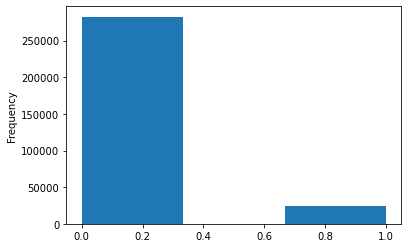

In [6]:
app_train['TARGET'].astype(int).plot.hist(bins=3);

# Data Cleaning

In [7]:
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [13]:
app_train.isnull().sum()[app_train.isnull().sum()>0].index

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [14]:
NULL =['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [15]:
app_train.dropna(axis=0, inplace=True, subset=NULL)

In [16]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [17]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [18]:
app_test.isnull().sum()[app_test.isnull().sum()>0].index

Index(['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPART

In [19]:
NULL_2 = ['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [21]:
app_test.dropna(axis=0, inplace=True, subset=NULL)

In [22]:
app_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [39]:
pd.DataFrame(app_train).corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.015474,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,-0.006509,0.006310,-0.011304,...,0.022281,0.003473,-0.005464,0.006155,-0.010707,0.001187,-0.007661,-0.010726,-0.008949,-0.017236
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,...,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
CNT_CHILDREN,0.005075,-0.019993,1.000000,-0.023069,-0.015191,-0.020395,-0.021157,-0.025688,0.175747,0.014600,...,-0.010280,-0.012527,-0.006602,-0.011857,-0.009919,-0.002712,-0.001043,-0.023803,-0.022028,-0.035499
AMT_INCOME_TOTAL,-0.011396,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.354556,0.211133,-0.119206,-0.028260,...,0.041473,0.010493,0.003233,0.031045,0.026559,-0.001641,0.024093,0.024042,0.006707,-0.007158
AMT_CREDIT,-0.013768,-0.014634,-0.015191,0.348575,1.000000,0.751587,0.987994,0.110804,-0.198152,-0.068760,...,0.061362,0.044737,0.073881,0.016894,0.007742,0.018995,0.012926,0.056718,0.003209,-0.057768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001187,0.014616,-0.002712,-0.001641,0.018995,0.014015,0.019636,-0.006398,0.018687,0.025302,...,0.005988,-0.001495,-0.002006,-0.000945,0.214817,1.000000,0.215462,-0.002107,-0.014587,0.003018
AMT_REQ_CREDIT_BUREAU_WEEK,-0.007661,0.015000,-0.001043,0.024093,0.012926,0.026397,0.014701,-0.000075,0.003329,0.004644,...,-0.007608,-0.004512,-0.006055,-0.002853,0.021885,0.215462,1.000000,-0.012199,-0.043595,0.024866
AMT_REQ_CREDIT_BUREAU_MON,-0.010726,-0.004202,-0.023803,0.024042,0.056718,0.025826,0.053417,0.081290,-0.036862,-0.014233,...,-0.009728,-0.003885,-0.004528,-0.005364,0.013652,-0.002107,-0.012199,1.000000,-0.035314,-0.010767
AMT_REQ_CREDIT_BUREAU_QRT,-0.008949,0.016465,-0.022028,0.006707,0.003209,0.016595,0.004426,-0.024234,-0.014376,0.025230,...,-0.006256,-0.010430,-0.013997,-0.006595,0.000241,-0.014587,-0.043595,-0.035314,1.000000,0.088951


In [58]:
app_train.corr()['TARGET'].sort_values().head(40)

EXT_SOURCE_3                 -0.150720
EXT_SOURCE_2                 -0.130969
EXT_SOURCE_1                 -0.129548
FLOORSMAX_AVG                -0.046110
FLOORSMAX_MODE               -0.045990
FLOORSMAX_MEDI               -0.045206
AMT_INCOME_TOTAL             -0.039762
FLOORSMIN_MEDI               -0.033313
FLOORSMIN_AVG                -0.032904
FLOORSMIN_MODE               -0.031688
TOTALAREA_MODE               -0.029714
LIVINGAPARTMENTS_AVG         -0.028103
APARTMENTS_AVG               -0.028069
FLAG_DOCUMENT_13             -0.027218
YEARS_BUILD_AVG              -0.026922
LIVINGAPARTMENTS_MEDI        -0.026595
APARTMENTS_MEDI              -0.026566
YEARS_BUILD_MEDI             -0.026491
ELEVATORS_AVG                -0.025762
LIVINGAREA_AVG               -0.025545
YEARS_BUILD_MODE             -0.025116
LIVINGAREA_MEDI              -0.024612
LIVINGAPARTMENTS_MODE        -0.024423
ELEVATORS_MEDI               -0.024361
LIVINGAREA_MODE              -0.024207
CNT_FAM_MEMBERS          

In [53]:
app_train.corr()['TARGET'].sort_values().tail(20)

SK_ID_CURR                     0.015474
AMT_REQ_CREDIT_BUREAU_QRT      0.016465
DAYS_LAST_PHONE_CHANGE         0.019082
DEF_60_CNT_SOCIAL_CIRCLE       0.020796
FLAG_DOCUMENT_7                0.021218
DEF_30_CNT_SOCIAL_CIRCLE       0.022807
DAYS_ID_PUBLISH                0.024877
OWN_CAR_AGE                    0.028052
OBS_60_CNT_SOCIAL_CIRCLE       0.030730
OBS_30_CNT_SOCIAL_CIRCLE       0.031041
AMT_REQ_CREDIT_BUREAU_YEAR     0.033832
DAYS_BIRTH                     0.041108
REGION_RATING_CLIENT           0.053614
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT_W_CITY    0.061214
DAYS_EMPLOYED                  0.062950
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
FLAG_DOCUMENT_4                     NaN
Name: TARGET, dtype: float64

In [56]:
app_train.corr()['TARGET'][abs(app_train.corr()['TARGET']) < 0.02 ].index

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE',
       'LANDAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI',
       'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOC

In [63]:
train = app_train.drop(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE',
       'LANDAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI',
       'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_MOBIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4'], axis = 1)

In [64]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,Cash loans,M,Y,Y,103500.0,463500.0,Unaccompanied,Working,Secondary / secondary special,...,2.0,1.0,2.0,1.0,1,0,0,0,0,3.0
124,0,Cash loans,F,Y,Y,202500.0,198000.0,Family,Working,Secondary / secondary special,...,6.0,0.0,6.0,0.0,1,0,0,0,0,3.0
152,0,Cash loans,F,Y,N,202500.0,675000.0,Unaccompanied,Commercial associate,Higher education,...,0.0,0.0,0.0,0.0,0,0,0,0,0,4.0
161,0,Cash loans,M,Y,N,162000.0,238500.0,Unaccompanied,Commercial associate,Higher education,...,5.0,0.0,5.0,0.0,1,0,0,0,0,3.0
255,1,Cash loans,M,Y,N,225000.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,3.0,0.0,3.0,0.0,1,0,0,0,0,1.0


In [65]:
test = app_test.drop(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE',
       'LANDAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI',
       'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_MOBIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4'], axis = 1)

In [66]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR
15,Cash loans,M,Y,Y,180000.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,2.0,0.0,2.0,0.0,0,0,0,0,0,3.0
18,Cash loans,F,Y,Y,225000.0,360000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,...,5.0,0.0,5.0,0.0,1,0,0,0,0,4.0
73,Cash loans,M,Y,Y,180000.0,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,...,3.0,0.0,3.0,0.0,0,0,0,0,0,2.0
86,Cash loans,M,Y,Y,225000.0,270000.0,Unaccompanied,Working,Higher education,Married,...,3.0,0.0,3.0,0.0,1,0,0,0,0,3.0
102,Cash loans,M,Y,N,202500.0,697500.0,Unaccompanied,Working,Incomplete higher,Married,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0.0


<AxesSubplot:>

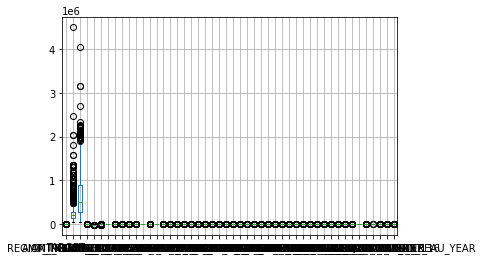

In [71]:
train.boxplot()

# Data Processing

# Modelling Data